In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

In [2]:
df = pd.read_csv('hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
df.shape

(119390, 32)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
hotel                             119390 non-null object
is_canceled                       119390 non-null int64
lead_time                         119390 non-null int64
arrival_date_year                 119390 non-null int64
arrival_date_month                119390 non-null object
arrival_date_week_number          119390 non-null int64
arrival_date_day_of_month         119390 non-null int64
stays_in_weekend_nights           119390 non-null int64
stays_in_week_nights              119390 non-null int64
adults                            119390 non-null int64
children                          119386 non-null float64
babies                            119390 non-null int64
meal                              119390 non-null object
country                           118902 non-null object
market_segment                    119390 non-null object
distribution_channel              119390 n

In [5]:
df.describe(include='all')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,119390,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,...,119390,103050.000000,6797.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390,119390
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,...,3,NaN,NaN,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,...,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,2015-10-21
freq,79330,NaN,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,...,104641,NaN,NaN,NaN,89613,NaN,NaN,NaN,75166,1461
mean,NaN,0.370416,104.011416,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,1.856403,...,NaN,86.693382,189.266735,2.321149,NaN,101.831122,0.062518,0.571363,NaN,NaN
std,NaN,0.482918,106.863097,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,0.579261,...,NaN,110.774548,131.655015,17.594721,NaN,50.535790,0.245291,0.792798,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,...,NaN,1.000000,6.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,...,NaN,9.000000,62.000000,0.000000,NaN,69.290000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,...,NaN,14.000000,179.000000,0.000000,NaN,94.575000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,160.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,...,NaN,229.000000,270.000000,0.000000,NaN,126.000000,0.000000,1.000000,NaN,NaN


## EDA and Data Visualization

In [6]:
# dropping company column because it contains so many nan values

df = df.drop('company', axis = 1)

In [7]:
df.shape

(119390, 31)

In [8]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [9]:
categorical_features = ['hotel','stays_in_week_nights','adults','children','babies','distribution_channel','is_repeated_guest',
'previous_bookings_not_canceled','assigned_room_type','customer_type','adr','required_car_parking_spaces'
, 'arrival_date_month','meal','country','market_segment','reserved_room_type','reserved_room_type','reservation_status',
             'reservation_status_date','deposit_type','reserved_room_type','reserved_room_type'
             ,'reserved_room_type']

In [10]:
df[categorical_features] = df[categorical_features].astype('category')

In [11]:
df['reservation_status_date']= pd.to_datetime(df['reservation_status_date'])

In [12]:
MonthtoNum = {'January':1, 'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,
             'August':8,'September':9,'October':10,'November':11,'December':12}

In [13]:
df.shape

(119390, 31)

In [14]:
df.dtypes

hotel                             category
is_canceled                          int64
lead_time                            int64
arrival_date_year                    int64
arrival_date_month                category
arrival_date_week_number             int64
arrival_date_day_of_month            int64
stays_in_weekend_nights              int64
stays_in_week_nights              category
adults                            category
children                          category
babies                            category
meal                              category
country                           category
market_segment                    category
distribution_channel              category
is_repeated_guest                 category
previous_cancellations               int64
previous_bookings_not_canceled    category
reserved_room_type                  object
assigned_room_type                category
booking_changes                      int64
deposit_type                      category
agent      

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 31 columns):
hotel                             119390 non-null category
is_canceled                       119390 non-null int64
lead_time                         119390 non-null int64
arrival_date_year                 119390 non-null int64
arrival_date_month                119390 non-null category
arrival_date_week_number          119390 non-null int64
arrival_date_day_of_month         119390 non-null int64
stays_in_weekend_nights           119390 non-null int64
stays_in_week_nights              119390 non-null category
adults                            119390 non-null category
children                          119386 non-null category
babies                            119390 non-null category
meal                              119390 non-null category
country                           118902 non-null category
market_segment                    119390 non-null category
distribution_channel  

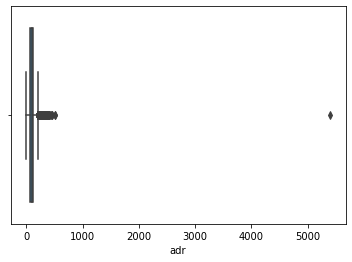

In [16]:
ax = sns.boxplot(x = df['adr'])

In [17]:
df['adr'] = df['adr'].astype('int')

In [18]:
df = df[df['adr'] < 5000]

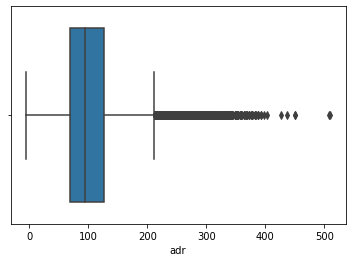

In [19]:
ax = sns.boxplot(x = df['adr'])

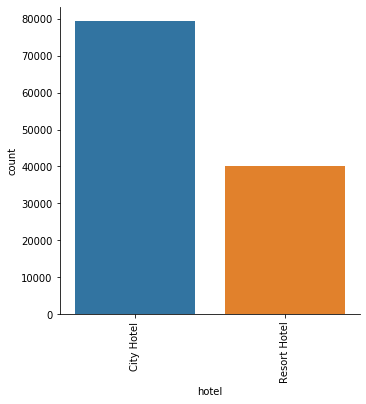

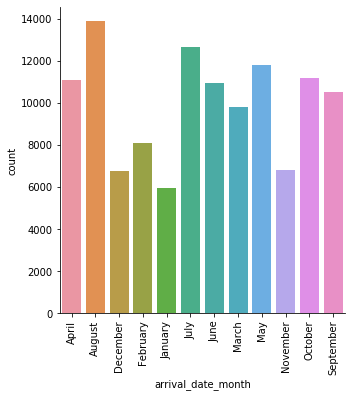

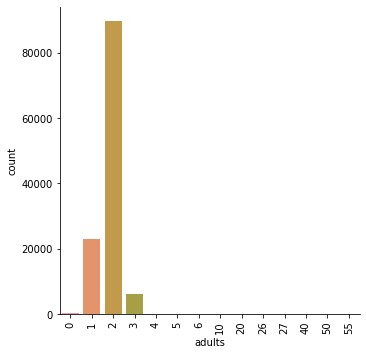

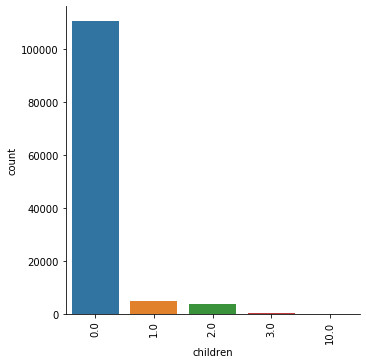

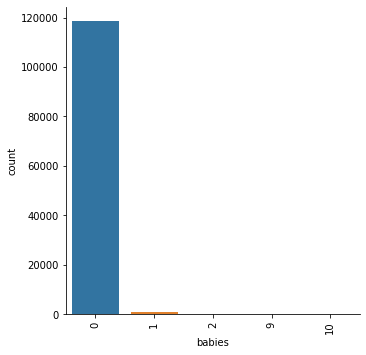

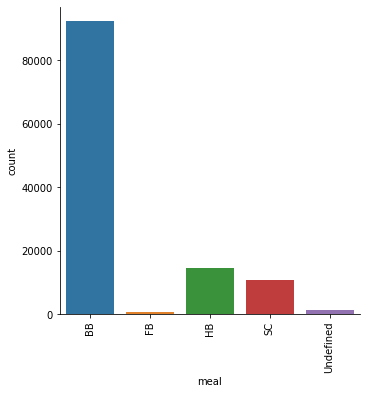

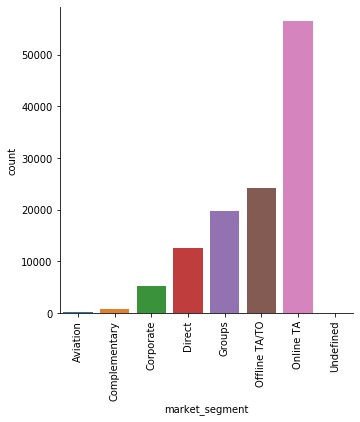

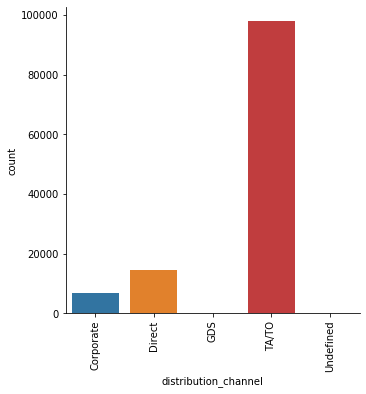

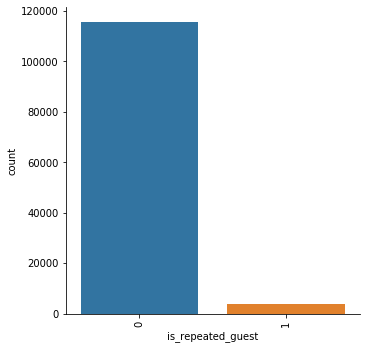

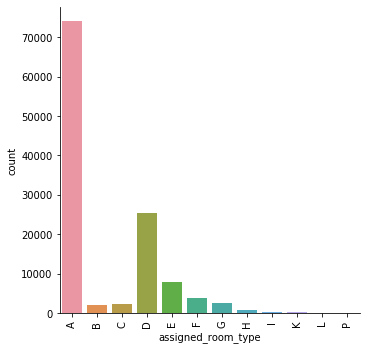

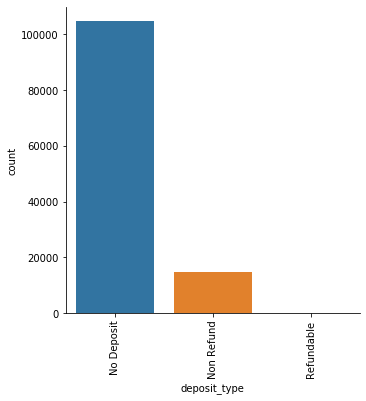

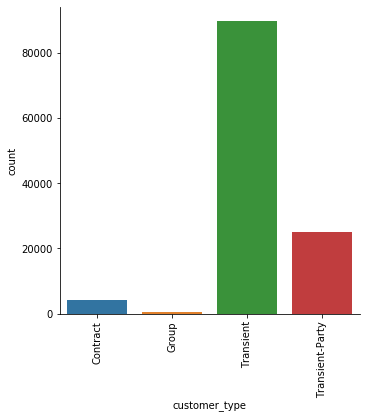

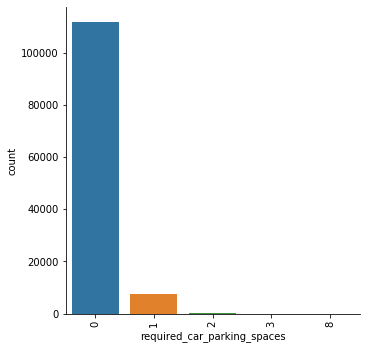

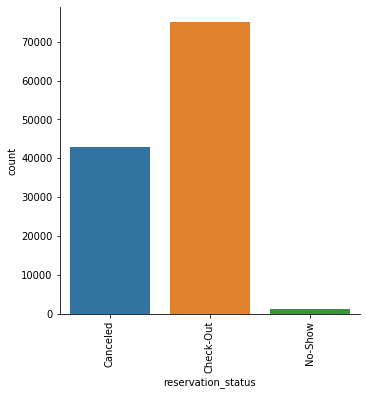

In [20]:
# The function generating the EDA for categorical data

def categorical_eda(df):
    print('To Check: Unique count of non-numerical data')
    print(df.select_dtypes(include = ['category']).nunique())
    
 # Plot count distribution of categorical data

for col in df.select_dtypes(include='category').columns:
    if df[col].nunique() < 20:
        fig = sns.catplot(x = col, kind = 'count', data = df)
        plt.xticks(rotation = 90)
        plt.show()

In [21]:
categorical_eda(df)

To Check: Unique count of non-numerical data
hotel                               2
arrival_date_month                 12
stays_in_week_nights               35
adults                             14
children                            5
babies                              5
meal                                5
country                           177
market_segment                      8
distribution_channel                5
is_repeated_guest                   2
previous_bookings_not_canceled     73
assigned_room_type                 12
deposit_type                        3
customer_type                       4
required_car_parking_spaces         5
reservation_status                  3
reservation_status_date           926
dtype: int64


In [22]:
reservation_df = df[['hotel', 'reservation_status']]

In [23]:
reservation_df.groupby(['hotel']).count()

,reservation_status
hotel,
City Hotel,79329
Resort Hotel,40060


In [24]:
df1 = df[df['hotel'] == 'City Hotel']
df1['reservation_status'].value_counts()

Check-Out    46228
Canceled     32185
No-Show        916
Name: reservation_status, dtype: int64

In [25]:
df2 = df[df['hotel'] == 'Resort Hotel']
df2['reservation_status'].value_counts()

Check-Out    28938
Canceled     10831
No-Show        291
Name: reservation_status, dtype: int64

In [26]:
# Percentage of Cancelation
print('Percentage of calculation in City Hotel: ',(32185/79329)*100)
print('Percentage of calculation in Resort Hotel: ',(10831/40060)*100)

Percentage of calculation in City Hotel:  40.57154382382231
Percentage of calculation in Resort Hotel:  27.03694458312531


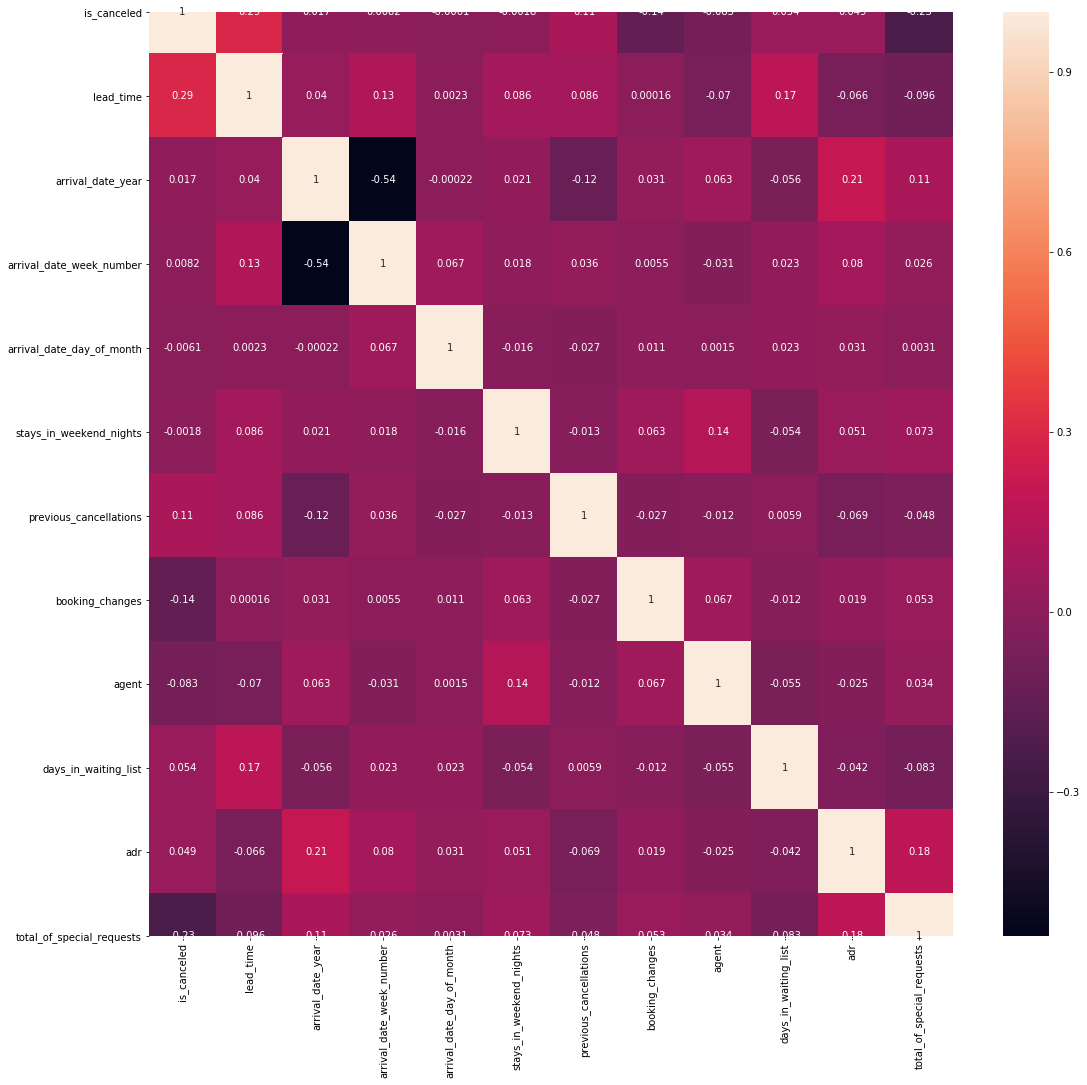

In [27]:
plt.figure(figsize = (18, 17))
sns.heatmap(df.corr(), annot = True)
plt.show()

## Handling Of Categorical Features

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
features = ['lead_time','total_of_special_requests','required_car_parking_spaces','booking_changes',
          'previous_cancellations','is_repeated_guest','adults','previous_bookings_not_canceled','days_in_waiting_list'
        , 'hotel',
'arrival_date_month',
'stays_in_week_nights',
'adults',
'children',
'babies',
'country',
'market_segment',
'distribution_channel',
'is_repeated_guest',
'previous_bookings_not_canceled',
'deposit_type',
'customer_type',
'adr',
'required_car_parking_spaces'
]

In [30]:
le = LabelEncoder()
df = df.apply(lambda col: le.fit_transform(col.astype(str)), axis=0, result_type='expand')

In [31]:
for i in features:
    le = LabelEncoder()
    df[i] = le.fit_transform(df[[i]])

C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Model Building

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, r2_score

In [33]:
x = df[features]
y = df['is_canceled']

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [35]:
# Performing Logistic Regression

lr = LogisticRegression(random_state = 1)
lr.fit(x_train, y_train)
lr.score(x_test, y_test)

C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7756651869224112

In [36]:
y_pred = lr.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[20798  1603]
 [ 6432  6984]]
              precision    recall  f1-score   support

           0       0.76      0.93      0.84     22401
           1       0.81      0.52      0.63     13416

    accuracy                           0.78     35817
   macro avg       0.79      0.72      0.74     35817
weighted avg       0.78      0.78      0.76     35817



In [37]:
# Performing Decision Tree
dt = DecisionTreeClassifier(random_state= 1)
dt.fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

[[19303  3098]
 [ 3100 10316]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86     22401
           1       0.77      0.77      0.77     13416

    accuracy                           0.83     35817
   macro avg       0.82      0.82      0.82     35817
weighted avg       0.83      0.83      0.83     35817



In [38]:
dt = DecisionTreeClassifier(random_state= 1, max_depth=5)
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[20314  2087]
 [ 5047  8369]]
              precision    recall  f1-score   support

           0       0.80      0.91      0.85     22401
           1       0.80      0.62      0.70     13416

    accuracy                           0.80     35817
   macro avg       0.80      0.77      0.78     35817
weighted avg       0.80      0.80      0.79     35817



In [39]:
# Performing RandomForest Classifiaction
rf = RandomForestClassifier(random_state=45, n_estimators=100)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

[[20719  1682]
 [ 3011 10405]]
              precision    recall  f1-score   support

           0       0.87      0.92      0.90     22401
           1       0.86      0.78      0.82     13416

    accuracy                           0.87     35817
   macro avg       0.87      0.85      0.86     35817
weighted avg       0.87      0.87      0.87     35817



In [40]:
rf = RandomForestClassifier(random_state=45, n_estimators=150)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[20720  1681]
 [ 2990 10426]]
              precision    recall  f1-score   support

           0       0.87      0.92      0.90     22401
           1       0.86      0.78      0.82     13416

    accuracy                           0.87     35817
   macro avg       0.87      0.85      0.86     35817
weighted avg       0.87      0.87      0.87     35817



In [ ]:
# Performing KNN Classifier

In [42]:
knn = KNeighborsClassifier(n_neighbors=16)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

[[19900  2501]
 [ 5923  7493]]
              precision    recall  f1-score   support

           0       0.77      0.89      0.83     22401
           1       0.75      0.56      0.64     13416

    accuracy                           0.76     35817
   macro avg       0.76      0.72      0.73     35817
weighted avg       0.76      0.76      0.76     35817



In [43]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[19469  2932]
 [ 5524  7892]]
              precision    recall  f1-score   support

           0       0.78      0.87      0.82     22401
           1       0.73      0.59      0.65     13416

    accuracy                           0.76     35817
   macro avg       0.75      0.73      0.74     35817
weighted avg       0.76      0.76      0.76     35817



In [44]:
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[19460  2941]
 [ 5582  7834]]
              precision    recall  f1-score   support

           0       0.78      0.87      0.82     22401
           1       0.73      0.58      0.65     13416

    accuracy                           0.76     35817
   macro avg       0.75      0.73      0.73     35817
weighted avg       0.76      0.76      0.76     35817



In [45]:
# Performing SVM Classifition
from sklearn.svm import LinearSVC
svm = LinearSVC(random_state= 1)
svm.fit(x_train, y_train)
y_pred_svm = svm.predict(x_test)
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

[[22369    32]
 [12565   851]]
              precision    recall  f1-score   support

           0       0.64      1.00      0.78     22401
           1       0.96      0.06      0.12     13416

    accuracy                           0.65     35817
   macro avg       0.80      0.53      0.45     35817
weighted avg       0.76      0.65      0.53     35817



C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [46]:
# Accuracy Comparison

print('Accuracy OF Each Model')
print('LOgistic Regression:          ', accuracy_score(y_test, y_pred))
print('Decision Tree CLassification: ', accuracy_score(y_test, y_pred_dt))
print('RandomFOrest Classification:  ', accuracy_score(y_test, y_pred_rf))
print('KNN Classification:           ', accuracy_score(y_test, y_pred_knn))
print('SVM Classification:           ', accuracy_score(y_test, y_pred_svm))

Accuracy OF Each Model
LOgistic Regression:           0.762040371890443
Decision Tree CLassification:  0.8269536812128319
RandomFOrest Classification:   0.8689728341290449
KNN Classification:            0.7648044224809448
SVM Classification:            0.6482955021358573


In [47]:
y_train.sort_index(inplace=True)

## Ensembling

In [48]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
pca = PCA(n_components = 2)
x_train = pca.fit_transform(x_train) 
x_test = pca.transform(x_test) 

explained_variance = pca.explained_variance_ratio_

In [49]:
explained_variance

array([0.51745443, 0.43824232])

In [50]:
rf = RandomForestClassifier(random_state=45, n_estimators=100)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

[[16244  6157]
 [10601  2815]]
              precision    recall  f1-score   support

           0       0.61      0.73      0.66     22401
           1       0.31      0.21      0.25     13416

    accuracy                           0.53     35817
   macro avg       0.46      0.47      0.46     35817
weighted avg       0.50      0.53      0.51     35817



In [51]:
model_list = [
    ('Logistic Regression',lr),
    ('Decision Tree', dt),
    ('Random Forest ', rf)
]

In [52]:
from sklearn.ensemble import VotingClassifier

vot_clf_hard = VotingClassifier(estimators= model_list, voting= 'hard')
vot_clf_hard.fit(x_train, y_train)

C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


VotingClassifier(estimators=[('Logistic Regression',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=1, solver='warn',
                                                 tol=0.0001, verbose=0,
                                                 warm_start=False)),
                             ('Decision Tree',
                              DecisionTreeClassifier(class_weight=None,
                                                     criterion...
                                                     class_weight=None,
                    

In [53]:
hard_vot_clf = vot_clf_hard.score(x_test, y_test)
hard_vot_clf

0.624675433453388

In [54]:
vot_clf_soft = VotingClassifier(estimators= model_list, voting= 'soft')
vot_clf_soft.fit(x_train, y_train)

C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


VotingClassifier(estimators=[('Logistic Regression',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=1, solver='warn',
                                                 tol=0.0001, verbose=0,
                                                 warm_start=False)),
                             ('Decision Tree',
                              DecisionTreeClassifier(class_weight=None,
                                                     criterion...
                                                     class_weight=None,
                    

In [55]:
soft_clf_vot = vot_clf_soft.score(x_test, y_test)
soft_clf_vot

0.6001060948711505